# Loading Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# Loading Data

In [2]:
PerreoRock = pd.read_csv('PerreoRock_sparsed.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = PerreoRock.copy()

# Overview of the Data

In [4]:
data.head() ##  view top 5 rows of the data

,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,beats,segments
0,Regeaton,0.812,0.479,2,-5.678,0,0.3330,0.213,0.000001,0.0756,0.559,169.922,59,645,938
1,Regeaton,0.859,0.658,11,-4.790,1,0.1590,0.145,0.000000,0.1200,0.672,100.065,192,323,862
2,Regeaton,0.757,0.789,5,-3.460,0,0.0583,0.307,0.000000,0.0717,0.464,91.911,175,306,802
3,Regeaton,0.691,0.765,8,-4.727,1,0.1110,0.464,0.000003,0.2030,0.855,174.021,163,707,1057
4,Regeaton,0.834,0.828,11,-2.660,0,0.0452,0.210,0.000006,0.1030,0.580,102.025,128,332,843


In [5]:
data.tail() ##  view last 5 rows of the data 

,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,beats,segments
1039,Rock,0.829,0.487,0,-9.751,1,0.0278,0.067100,0.002630,0.127,0.776,120.173,9,508,884
1040,Rock,0.194,0.825,7,-2.605,1,0.0410,0.086400,0.002840,0.182,0.350,169.974,2,1004,832
1041,Rock,0.472,0.783,7,-7.508,0,0.0523,0.011100,0.000808,0.134,0.784,141.070,9,496,817
1042,Rock,0.204,0.837,5,-7.618,1,0.0676,0.281000,0.004050,0.291,0.392,171.514,134,1582,2172
1043,Rock,0.386,0.996,11,-2.960,0,0.0754,0.000012,0.000836,0.116,0.188,130.573,96,428,823


In [6]:
data.shape ##  view dimensions of the data

(1044, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist_name     1044 non-null   object 
 1   danceability      1044 non-null   float64
 2   energy            1044 non-null   float64
 3   key               1044 non-null   int64  
 4   loudness          1044 non-null   float64
 5   mode              1044 non-null   int64  
 6   speechiness       1044 non-null   float64
 7   acousticness      1044 non-null   float64
 8   instrumentalness  1044 non-null   float64
 9   liveness          1044 non-null   float64
 10  valence           1044 non-null   float64
 11  tempo             1044 non-null   float64
 12  genre             1044 non-null   int64  
 13  beats             1044 non-null   int64  
 14  segments          1044 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 122.5+ KB


In [8]:
# checking for duplicate values
data.duplicated().sum() 

66

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

playlist_name       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
beats               0
segments            0
dtype: int64

In [13]:
# Print the cumulative percentage of each genre
cumulative_percentages = data['genre'].value_counts(1).cumsum()

# Print the cumulative percentage of each genre
print(cumulative_percentages)

cumulative_percentages.to_csv('cumulative_percentages.csv')


175    0.169734
122    0.232106
7      0.281186
3      0.310838
59     0.337423
         ...   
31     0.995910
125    0.996933
12     0.997955
62     0.998978
148    1.000000
Name: genre, Length: 202, dtype: float64


<Axes: >

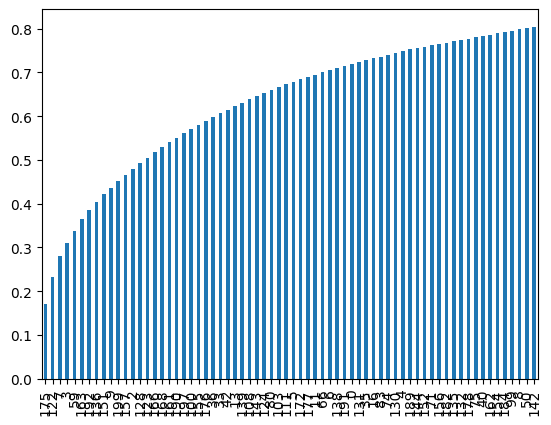

In [14]:
data['genre'].value_counts(1).cumsum().sort_values(ascending=True)[0:68].plot(kind='bar')

In [15]:
# create a boolean mask for the top 68 genres
top_genres = data['genre'].value_counts(1).cumsum().sort_values(ascending=True)[0:68].index.tolist()
mask = data['genre'].isin(top_genres)

In [16]:
data.shape

(978, 15)

In [17]:
data.head()

,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,beats,segments
0,Regeaton,0.812,0.479,2,-5.678,0,0.3330,0.213,0.000001,0.0756,0.559,169.922,59,645,938
1,Regeaton,0.859,0.658,11,-4.790,1,0.1590,0.145,0.000000,0.1200,0.672,100.065,192,323,862
2,Regeaton,0.757,0.789,5,-3.460,0,0.0583,0.307,0.000000,0.0717,0.464,91.911,175,306,802
3,Regeaton,0.691,0.765,8,-4.727,1,0.1110,0.464,0.000003,0.2030,0.855,174.021,163,707,1057
4,Regeaton,0.834,0.828,11,-2.660,0,0.0452,0.210,0.000006,0.1030,0.580,102.025,128,332,843


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,978.0,0.654048,0.166468,0.163000,0.527250,0.691000,0.795000,0.951
energy,978.0,0.766460,0.131200,0.084200,0.685250,0.779000,0.863000,0.996
key,978.0,5.337423,3.495962,0.000000,2.000000,5.000000,8.000000,11.000
loudness,978.0,-5.217457,1.958249,-15.520000,-5.995500,-4.965000,-3.961000,-0.484
mode,978.0,0.542945,0.498407,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,978.0,0.100605,0.079141,0.025400,0.046825,0.071000,0.120000,0.591
acousticness,978.0,0.134334,0.170965,0.000006,0.004253,0.065100,0.194750,0.982
instrumentalness,978.0,0.022731,0.107360,0.000000,0.000000,0.000004,0.000579,0.946
liveness,978.0,0.193811,0.147332,0.019900,0.092725,0.132000,0.267750,0.882
valence,978.0,0.571441,0.212220,0.039800,0.415000,0.586500,0.733750,0.986


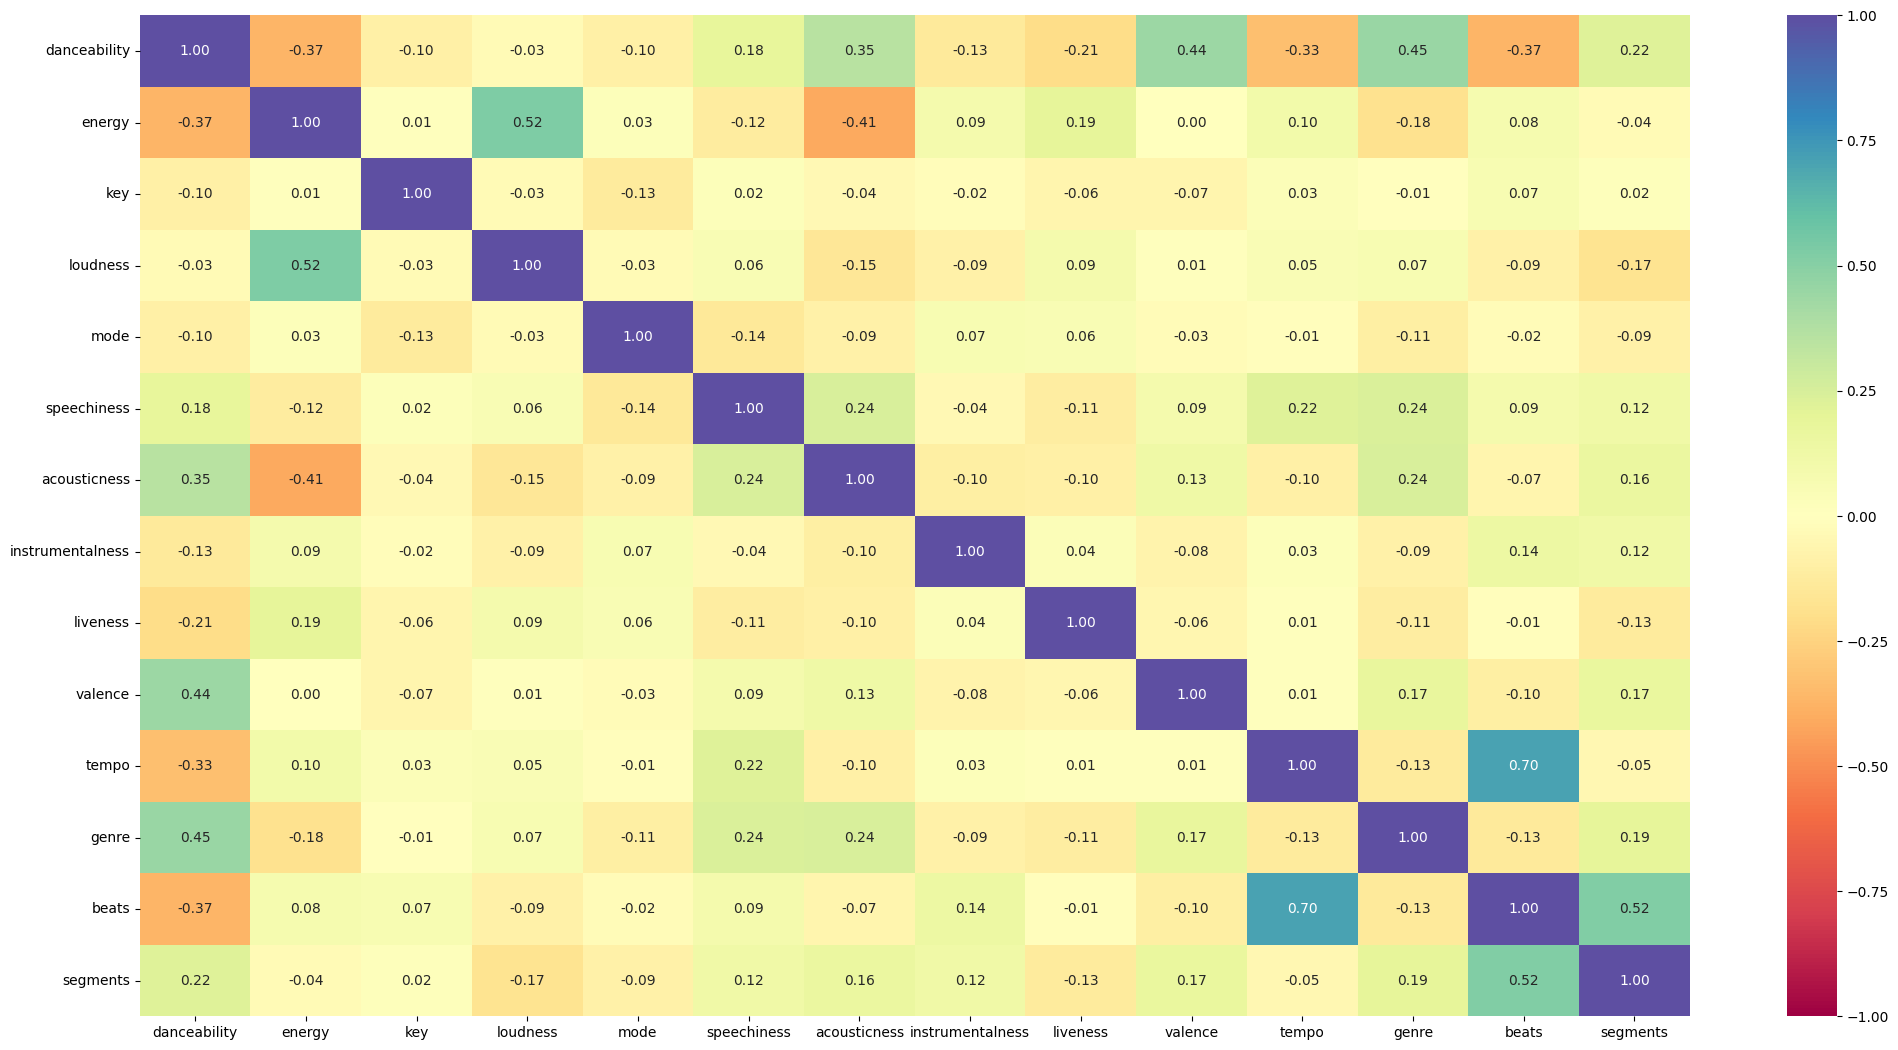

In [19]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(25, 13))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# Data Preprocessing-Scaling

In [20]:
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [21]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
target_variable = "playlist_name"

In [22]:
# scaling the data before Modeling
scaler = StandardScaler()
numeric_data = data[numeric_columns].copy()
numeric_data_scaled = scaler.fit_transform(numeric_data)

In [23]:
data_scaled = data.copy()
data_scaled[numeric_columns] = numeric_data_scaled

In [24]:
data = data_scaled

In [25]:
data.head()

,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,beats,segments
0,Regeaton,0.949328,-2.192129,-0.955139,-0.235301,-1.089917,2.937968,0.460367,-0.211828,-0.802754,-0.058651,1.456886,-0.858752,1.456918,0.527269
1,Regeaton,1.231808,-0.827102,1.620576,0.218397,0.917501,0.738235,0.062422,-0.211839,-0.501239,0.474088,-0.688224,1.208488,-0.548882,0.208533
2,Regeaton,0.618765,0.171884,-0.096567,0.897923,-1.089917,-0.534829,1.010469,-0.211839,-0.829238,-0.506529,-0.938610,0.944255,-0.654779,-0.043101
3,Regeaton,0.222090,-0.011136,0.762005,0.250585,0.917501,0.131412,1.929255,-0.211809,0.062403,1.336842,1.582755,0.757737,1.843128,1.026342
4,Regeaton,1.081553,0.469292,1.620576,1.306660,-1.089917,-0.700441,0.442811,-0.211784,-0.616684,0.040353,-0.628038,0.213726,-0.492820,0.128849


In [26]:
data.to_csv('mydata.csv', index=False)

# Data Preparation for Modeling

In [27]:
data["playlist_name"] = data["playlist_name"].apply(lambda x: 1 if x == "Regeaton" else 0)

X = data.drop("playlist_name", axis=1) ## Complete the code to drop case status from the data
y = data["playlist_name"]

In [28]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(586, 14) (196, 14) (196, 14)


In [29]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 586
Number of rows in validation data = 196
Number of rows in test data = 196


# Creating Models

 As the two variables are equal in importance, we need to maximize the F1 Score

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [31]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model and Hyperparameter Tunning

In [32]:
model=DecisionTreeClassifier(criterion='gini', random_state=1) ## define decision tree classifier with random state = 1
model.fit(X_train,y_train) ## fit decision tree classifier on the train data 

DecisionTreeClassifier(random_state=1)

### Checking Model Performance on Training Set

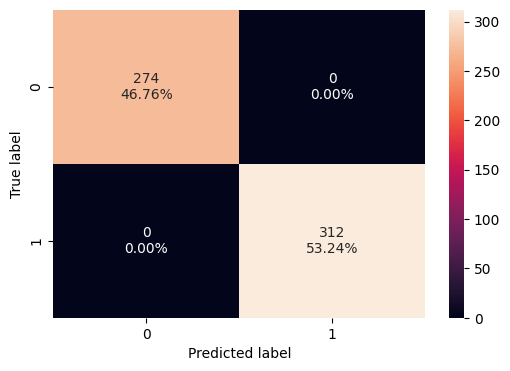

In [33]:
confusion_matrix_sklearn(model, X_train, y_train) ##  create confusion matrix for train data

In [34]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ##  check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking Model Performance on Validation Set

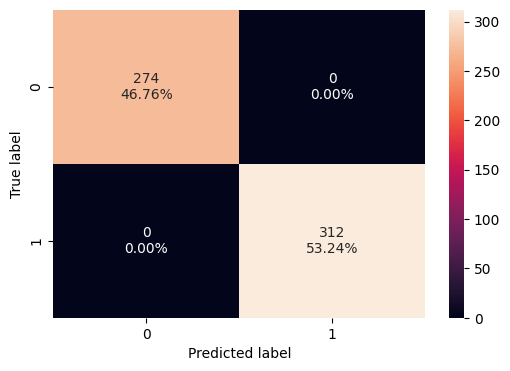

In [35]:
confusion_matrix_sklearn(model, X_train, y_train) ##  create confusion matrix for validation data

In [36]:
decision_tree_perf_val = model_performance_classification_sklearn(model, X_val, y_val) ##  check performance on validation data
decision_tree_perf_val 

,Accuracy,Recall,Precision,F1
0,0.923469,0.942308,0.915888,0.92891


### Checking Model Performance on Test Set

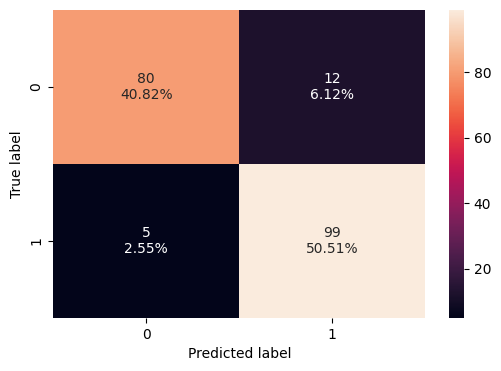

In [37]:
confusion_matrix_sklearn(model, X_test, y_test) ## create confusion matrix for test data

In [38]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.913265,0.951923,0.891892,0.92093


### Hyperparameter Tunning Decision Tree



In [39]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring= scorer, n_jobs= -1) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

#### Checking model performance on training set

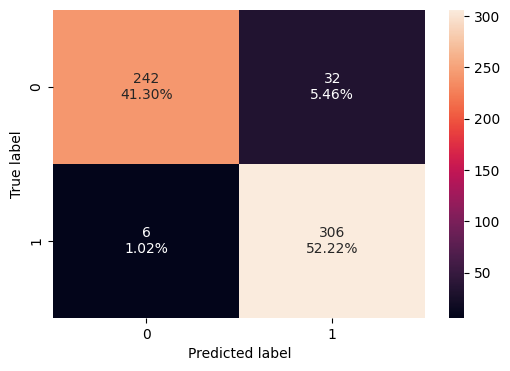

In [40]:
confusion_matrix_sklearn(dtree_estimator,X_train, y_train) ## create confusion matrix for train data on tuned estimator

In [41]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train) ##  check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.935154,0.980769,0.905325,0.941538


#### Checking model performance on validation set

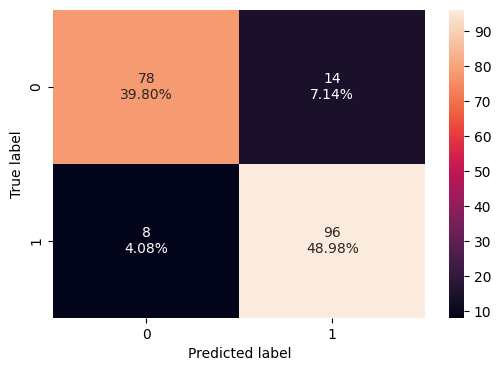

In [42]:
confusion_matrix_sklearn(dtree_estimator,X_val, y_val) ## create confusion matrix for validation data on tuned estimator

In [43]:
dtree_estimator_model_val_perf = model_performance_classification_sklearn(dtree_estimator, X_val, y_val) ##  check performance for validation data on tuned estimator
dtree_estimator_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.887755,0.923077,0.872727,0.897196


#### Checking model performance on test set

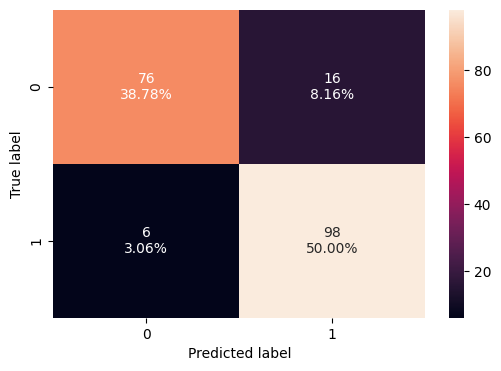

In [44]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test) ##  create confusion matrix for test data on tuned estimator

In [45]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) ##  check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.887755,0.942308,0.859649,0.899083


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [46]:
bagging_classifier = BaggingClassifier(random_state=1) ## define bagging classifier with random state = 1
bagging_classifier.fit(X_train,y_train) ## fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set

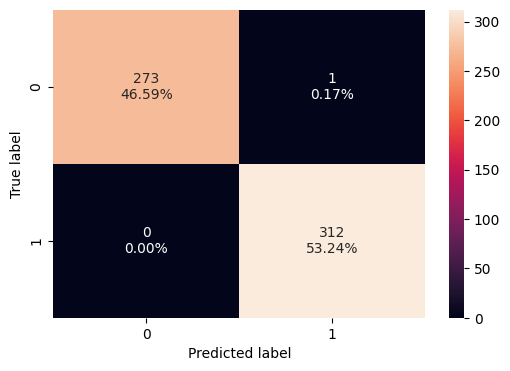

In [47]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train) ##  create confusion matrix for train data

In [48]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train) ##  check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998294,1.0,0.996805,0.9984


#### Checking model performance on validation set

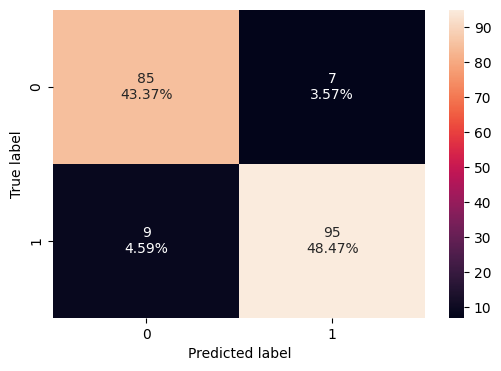

In [49]:
confusion_matrix_sklearn(bagging_classifier, X_val, y_val) ## create confusion matrix for validation data

In [50]:
bagging_classifier_model_val_perf = model_performance_classification_sklearn(bagging_classifier, X_val, y_val) ##check performance on validation data
bagging_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.918367,0.913462,0.931373,0.92233


#### Checking model performance on test set

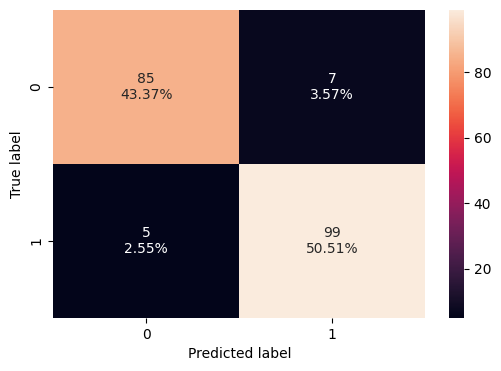

In [51]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test) ##  create confusion matrix for test data

In [52]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.938776,0.951923,0.933962,0.942857


### Hyperparameter Tuning - Bagging Classifier

In [53]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5) ##  run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=90,
                  random_state=1)

#### Checking model performance on training set

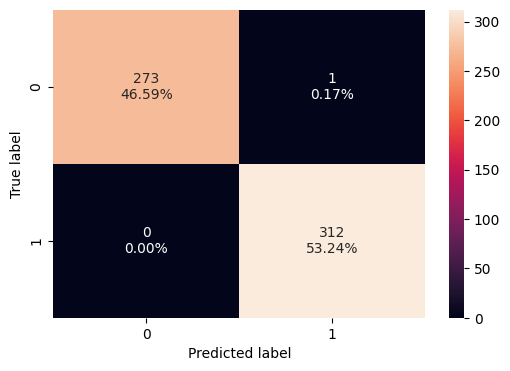

In [54]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train,y_train) ## confusion matrix for train data on tuned estimator

In [55]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train) ##  check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998294,1.0,0.996805,0.9984


#### Checking model performance on validation set

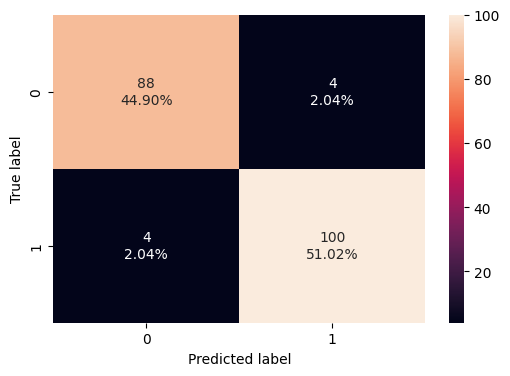

In [56]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_val,y_val) ##  create confusion matrix for validation data on tuned estimator

In [57]:
bagging_estimator_tuned_model_val_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_val,y_val) ##  check performance for validation data on tuned estimator
bagging_estimator_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.959184,0.961538,0.961538,0.961538


#### Checking model performance on test set

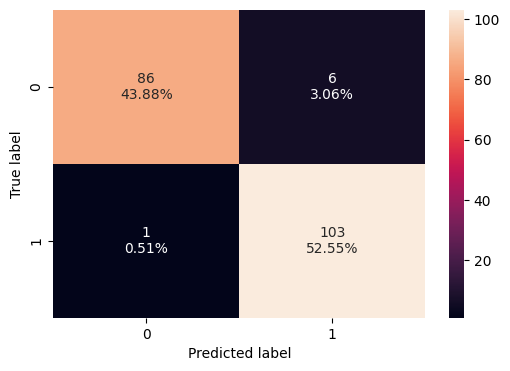

In [58]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test) ## create confusion matrix for test data on tuned estimator

In [59]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ##  check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.964286,0.990385,0.944954,0.967136


### Random Forest

In [60]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1) ## define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) ##fit random forest on the train data

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

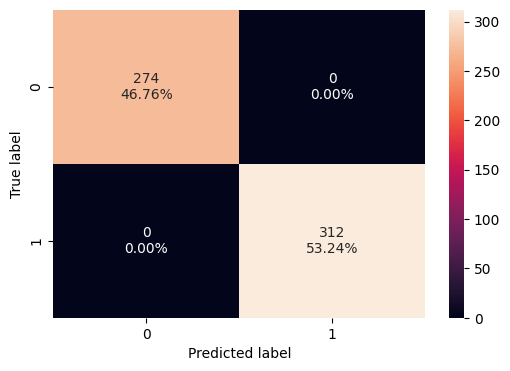

In [61]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)##  create confusion matrix for train data

In [62]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train,y_train) ## check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on validation set

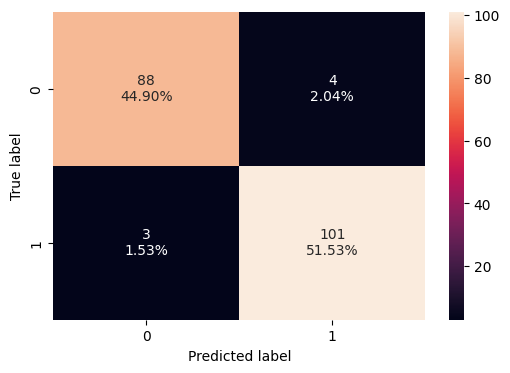

In [63]:
confusion_matrix_sklearn(rf_estimator, X_val,y_val)## create confusion matrix for validation data

In [64]:
# Calculating different metrics
rf_estimator_model_val_perf = model_performance_classification_sklearn(rf_estimator, X_val,y_val) ##  check performance on validation data
rf_estimator_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.964286,0.971154,0.961905,0.966507


#### Checking model performance on test set

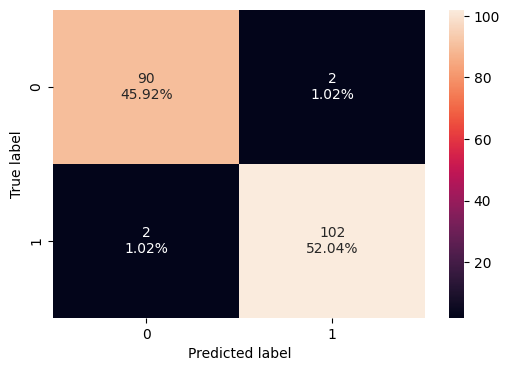

In [65]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) ##  create confusion matrix for test data

In [66]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) ##  check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.979592,0.980769,0.980769,0.980769


### Hyperparameter Tuning - Random Forest

In [67]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1) ## run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=25,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

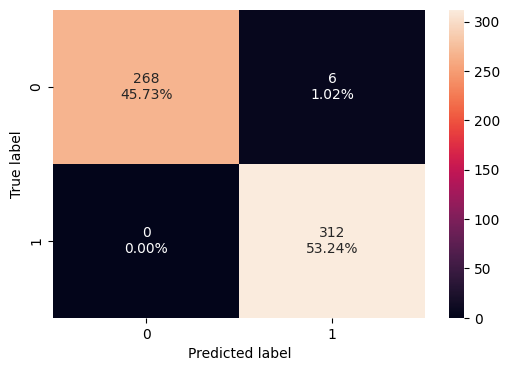

In [68]:
confusion_matrix_sklearn(rf_tuned , X_train,y_train) ##  create confusion matrix for train data on tuned estimator

In [69]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned , X_train,y_train) ##  check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.989761,1.0,0.981132,0.990476


#### Checking model performance on validation set

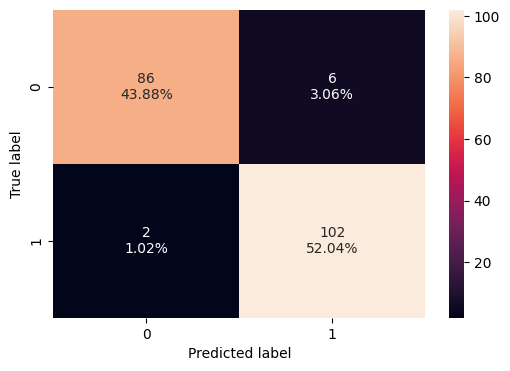

In [70]:
confusion_matrix_sklearn(rf_tuned , X_val,y_val) ## create confusion matrix for validation data on tuned estimator

In [71]:
rf_tuned_model_val_perf = model_performance_classification_sklearn(rf_tuned , X_val,y_val) ## check performance for validation data on tuned estimator
rf_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.959184,0.980769,0.944444,0.962264


#### Checking model performance on test set

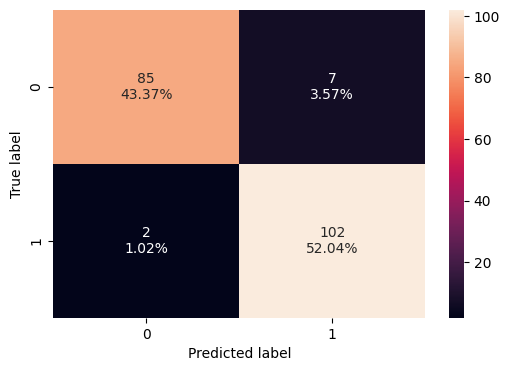

In [72]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) ## create confusion matrix for test data on tuned estimator

In [73]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) ##  check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.954082,0.980769,0.93578,0.957746


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [74]:
ab_classifier = AdaBoostClassifier(random_state=1) ## define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train,y_train) ## fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

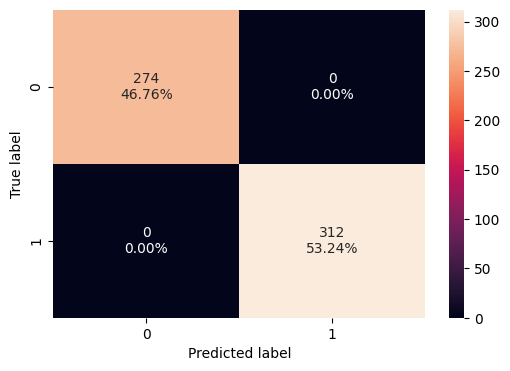

In [75]:
confusion_matrix_sklearn(ab_classifier, X_train,y_train)## create confusion matrix for train data

In [76]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train,y_train) ## check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on validation set

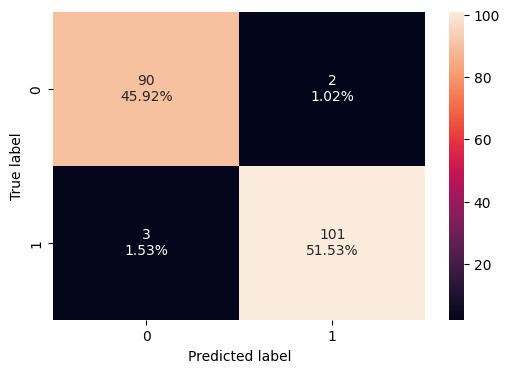

In [77]:
confusion_matrix_sklearn(ab_classifier, X_val,y_val)## create confusion matrix for validation data

In [78]:
ab_classifier_model_val_perf = model_performance_classification_sklearn(ab_classifier, X_val,y_val) ##  check performance on validation data
ab_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.97449,0.971154,0.980583,0.975845


#### Checking model performance on test set

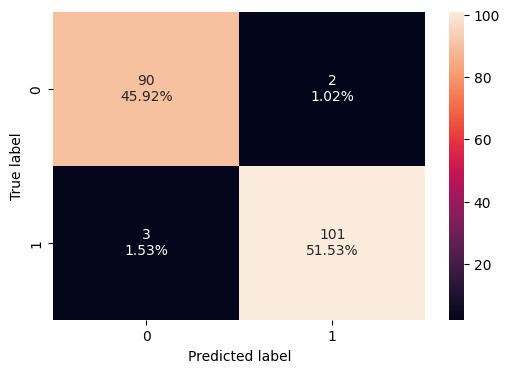

In [79]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test) ##  create confusion matrix for test data

In [80]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test) ##  check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.97449,0.971154,0.980583,0.975845


### Hyperparameter Tuning - AdaBoost Classifier

In [81]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5) ## run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ##  fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.4, n_estimators=80, random_state=1)

#### Checking model performance on training set

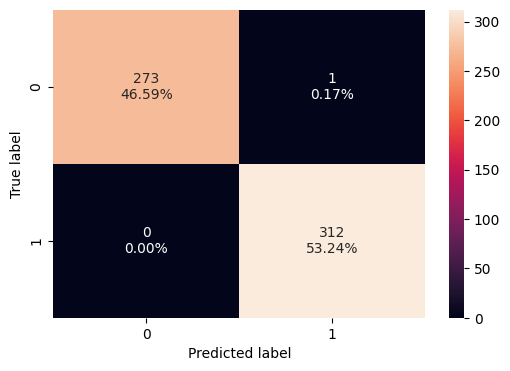

In [82]:
confusion_matrix_sklearn(abc_tuned, X_train,y_train) ## create confusion matrix for train data on tuned estimator

In [83]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train,y_train) ## check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998294,1.0,0.996805,0.9984


#### Checking model performance on validation set

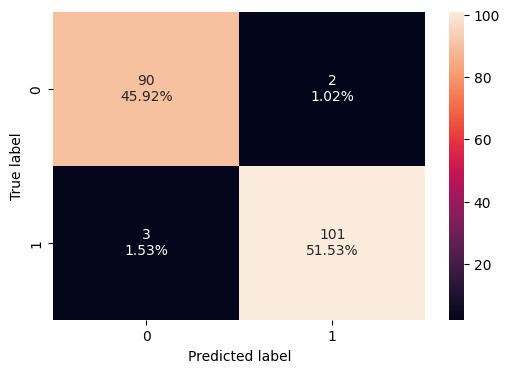

In [84]:
confusion_matrix_sklearn(abc_tuned, X_val,y_val) ## create confusion matrix for validation data on tuned estimator

In [85]:
abc_tuned_model_val_perf = model_performance_classification_sklearn(abc_tuned, X_val,y_val) ## check performance for validation data on tuned estimator
abc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.97449,0.971154,0.980583,0.975845


#### Checking model performance on test set

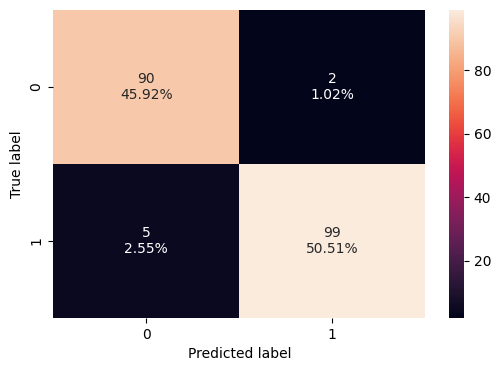

In [86]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test) ## create confusion matrix for test data on tuned estimator

In [87]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) ## check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.964286,0.951923,0.980198,0.965854


### Gradient Boosting Classifier

In [88]:
gb_classifier = GradientBoostingClassifier(random_state=1) ## define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train,y_train) ## fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

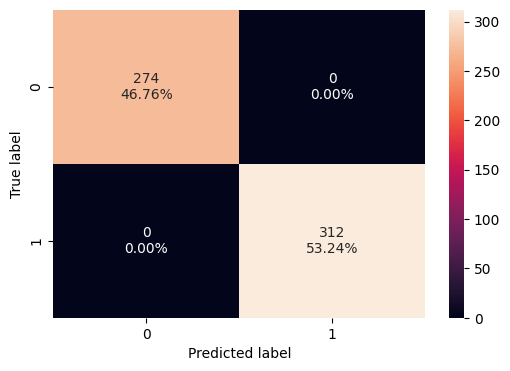

In [89]:
confusion_matrix_sklearn(gb_classifier, X_train,y_train) ## create confusion matrix for train data

In [90]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train,y_train) ## check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on validation set

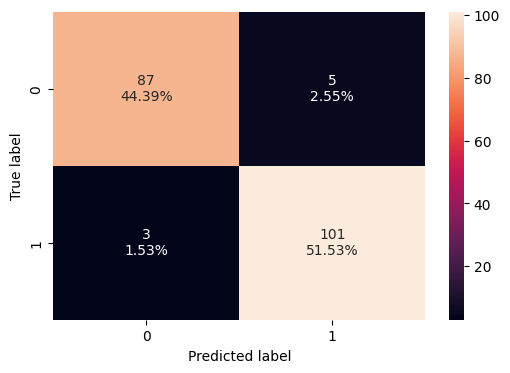

In [91]:
confusion_matrix_sklearn(gb_classifier, X_val,y_val) ## create confusion matrix for validation data

In [92]:
gb_classifier_model_val_perf = model_performance_classification_sklearn(gb_classifier, X_val,y_val) ## check performance on validation data
gb_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.959184,0.971154,0.95283,0.961905


#### Checking model performance on test set

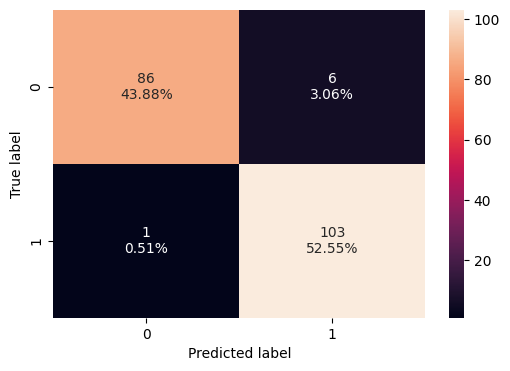

In [93]:
confusion_matrix_sklearn(gb_classifier, X_test,y_test) ##  create confusion matrix for test data

In [94]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test,y_test) ## check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.964286,0.990385,0.944954,0.967136


### Hyperparameter Tuning - Gradient Boosting Classifier

In [95]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5) ## run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ##  fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.8,
                           n_estimators=200, random_state=1, subsample=0.9)

#### Checking model performance on training set


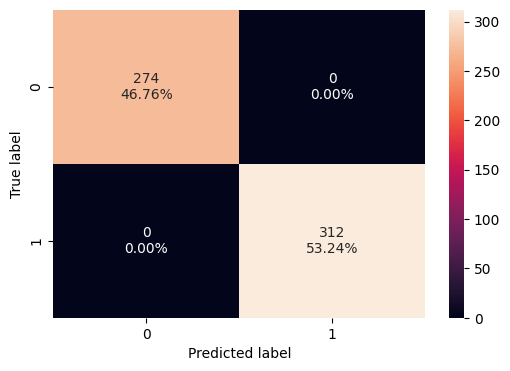

In [96]:
confusion_matrix_sklearn(gbc_tuned, X_train,y_train) ## create confusion matrix for train data on tuned estimator

In [97]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train,y_train) ## check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on validation set

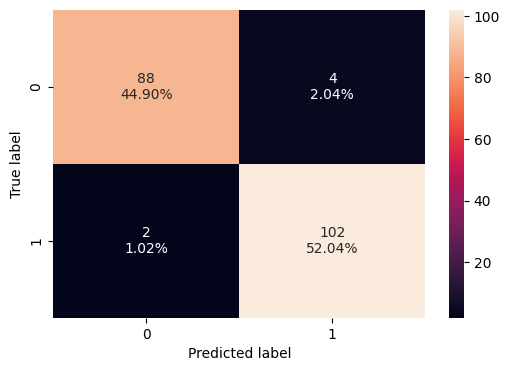

In [98]:
confusion_matrix_sklearn(gbc_tuned, X_val,y_val) ## create confusion matrix for validation data on tuned estimator

In [99]:
gbc_tuned_model_val_perf = model_performance_classification_sklearn(gbc_tuned, X_val,y_val) ## check performance for validation data on tuned estimator
gbc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.969388,0.980769,0.962264,0.971429


#### Checking model performance on test set

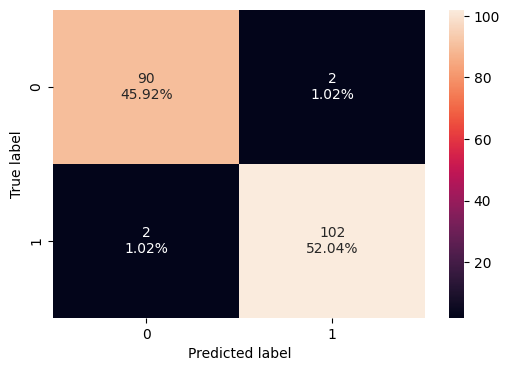

In [100]:
confusion_matrix_sklearn(gbc_tuned, X_test,y_test)## create confusion matrix for test data on tuned estimator

In [101]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test,y_test) ##  check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.979592,0.980769,0.980769,0.980769


### XGBoost Classifier

In [102]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss') ## define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train, y_train) ## fit XGBoost Classifier on the train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

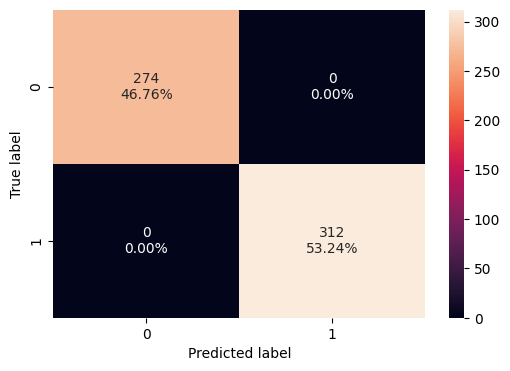

In [103]:
confusion_matrix_sklearn(xgb_classifier, X_train,y_train) ##  create confusion matrix for train data

In [104]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train,y_train) ## check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on validation set

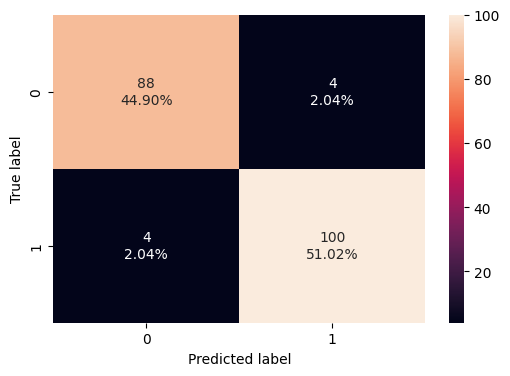

In [105]:
confusion_matrix_sklearn(xgb_classifier, X_val,y_val) ##  create confusion matrix for validation data

In [106]:
xgb_classifier_model_val_perf = model_performance_classification_sklearn(xgb_classifier, X_val,y_val) ##  check performance on validation data
xgb_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.959184,0.961538,0.961538,0.961538


#### Checking model performance on test set

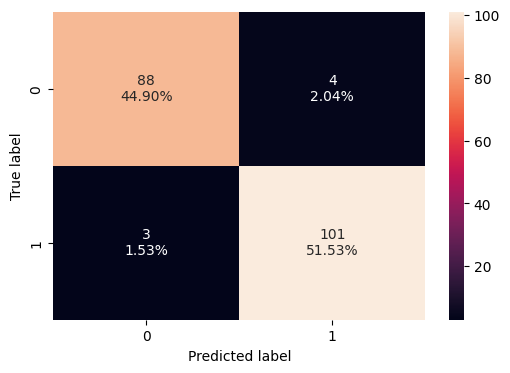

In [107]:
confusion_matrix_sklearn(xgb_classifier, X_test,y_test) ##create confusion matrix for test data

In [108]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test,y_test) ##  check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.964286,0.971154,0.961905,0.966507


### Hyperparameter Tuning - XGBoost Classifier

In [109]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5) ## run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

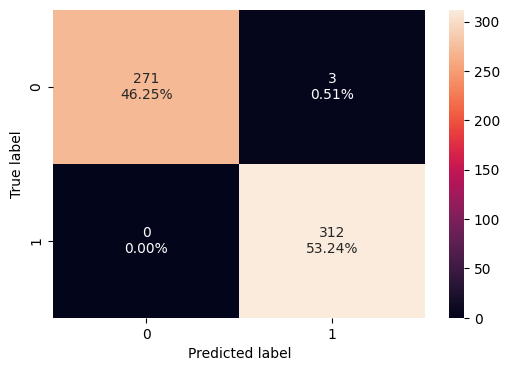

In [110]:
confusion_matrix_sklearn(xgb_tuned, X_train,y_train) ##  create confusion matrix for train data on tuned estimator

In [111]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train,y_train) ## check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.994881,1.0,0.990476,0.995215


#### Checking model performance on validation set

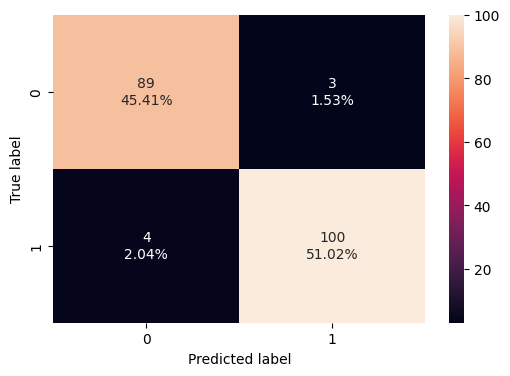

In [112]:
confusion_matrix_sklearn(xgb_tuned, X_val,y_val) ## create confusion matrix for validation data on tuned estimator

In [113]:
xgb_tuned_model_val_perf = model_performance_classification_sklearn(xgb_tuned, X_val,y_val) ## check performance for validation data on tuned estimator
xgb_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.964286,0.961538,0.970874,0.966184


#### Checking model performance on test set

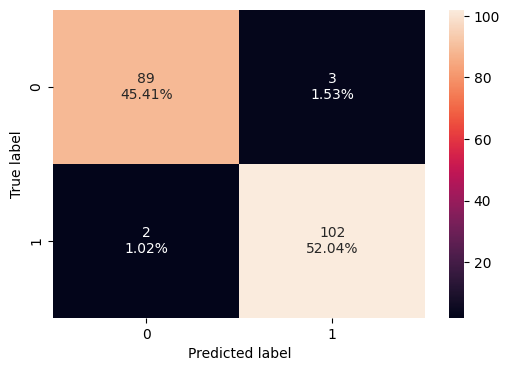

In [114]:
confusion_matrix_sklearn(xgb_tuned, X_test,y_test) ## create confusion matrix for test data on tuned estimator

In [115]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test,y_test) ##  check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.97449,0.980769,0.971429,0.976077


## Stacking Classifier

In [116]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier =StackingClassifier(estimators=estimators, final_estimator= xgb_tuned,cv=5)  ## define Stacking Classifier

stacking_classifier.fit(X_train,y_train) ## fit Stacking Classifier on the train data

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.2,
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_split=5,
                                                       n_estimators=25,
                                                       oob_score...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking model performance on training set

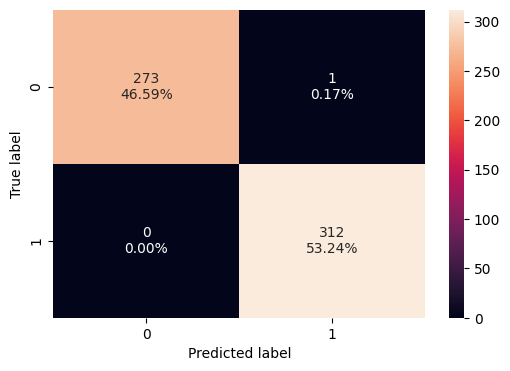

In [117]:
confusion_matrix_sklearn(stacking_classifier, X_train,y_train) ## create confusion matrix for train data

In [118]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train,y_train) ## check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998294,1.0,0.996805,0.9984


### Checking model performance on validation set

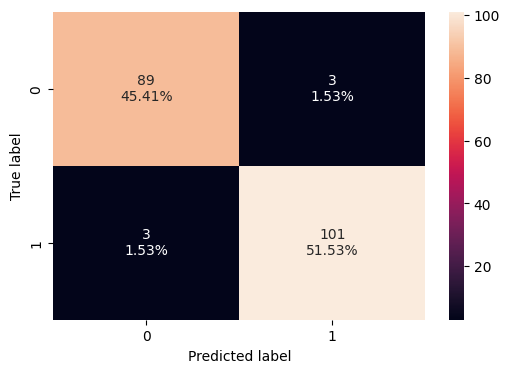

In [119]:
confusion_matrix_sklearn(stacking_classifier, X_val,y_val) ## create confusion matrix for validation data

In [120]:
stacking_classifier_model_val_perf = model_performance_classification_sklearn(stacking_classifier, X_val,y_val) ## check performance on validation data
stacking_classifier_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.969388,0.971154,0.971154,0.971154


### Checking model performance on test set

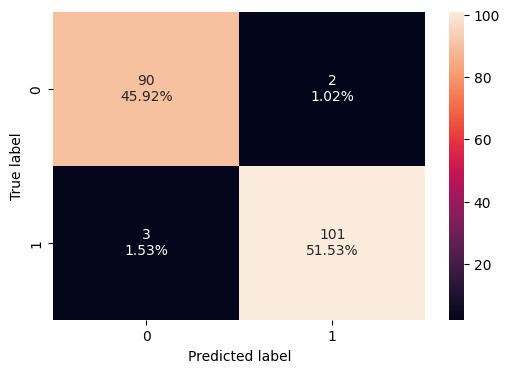

In [121]:
confusion_matrix_sklearn(stacking_classifier, X_test,y_test) ## create confusion matrix for test data

In [122]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test,y_test) ## check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.97449,0.971154,0.980583,0.975845


## Model Performance Comparison and Final Model Selection

In [123]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.935154,0.998294,0.998294,1.0,0.989761,1.0,0.998294,1.0,1.0,1.0,0.994881,0.998294
Recall,1.0,0.980769,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
Precision,1.0,0.905325,0.996805,0.996805,1.0,0.981132,1.0,0.996805,1.0,1.0,1.0,0.990476,0.996805
F1,1.0,0.941538,0.998400,0.998400,1.0,0.990476,1.0,0.998400,1.0,1.0,1.0,0.995215,0.998400


In [124]:
# testing performance comparison

models_validation_comp_df = pd.concat(
    [
        decision_tree_perf_val.T,
        dtree_estimator_model_val_perf.T,
        bagging_classifier_model_val_perf.T,
        bagging_estimator_tuned_model_val_perf.T,
        rf_estimator_model_val_perf.T,
        rf_tuned_model_val_perf.T,
        ab_classifier_model_val_perf.T,
        abc_tuned_model_val_perf.T,
        gb_classifier_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_classifier_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
        stacking_classifier_model_val_perf.T,
    ],
    axis=1,
)
models_validation_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Validation performance comparison:")
models_validation_comp_df

Validation performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.923469,0.887755,0.918367,0.959184,0.964286,0.959184,0.974490,0.974490,0.959184,0.969388,0.959184,0.964286,0.969388
Recall,0.942308,0.923077,0.913462,0.961538,0.971154,0.980769,0.971154,0.971154,0.971154,0.980769,0.961538,0.961538,0.971154
Precision,0.915888,0.872727,0.931373,0.961538,0.961905,0.944444,0.980583,0.980583,0.952830,0.962264,0.961538,0.970874,0.971154
F1,0.928910,0.897196,0.922330,0.961538,0.966507,0.962264,0.975845,0.975845,0.961905,0.971429,0.961538,0.966184,0.971154


In [125]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df ## Complete the code to check performance for test data

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.913265,0.887755,0.938776,0.964286,0.979592,0.954082,0.974490,0.964286,0.964286,0.979592,0.964286,0.974490,0.974490
Recall,0.951923,0.942308,0.951923,0.990385,0.980769,0.980769,0.971154,0.951923,0.990385,0.980769,0.971154,0.980769,0.971154
Precision,0.891892,0.859649,0.933962,0.944954,0.980769,0.935780,0.980583,0.980198,0.944954,0.980769,0.961905,0.971429,0.980583
F1,0.920930,0.899083,0.942857,0.967136,0.980769,0.957746,0.975845,0.965854,0.967136,0.980769,0.966507,0.976077,0.975845


### Important features of the final model


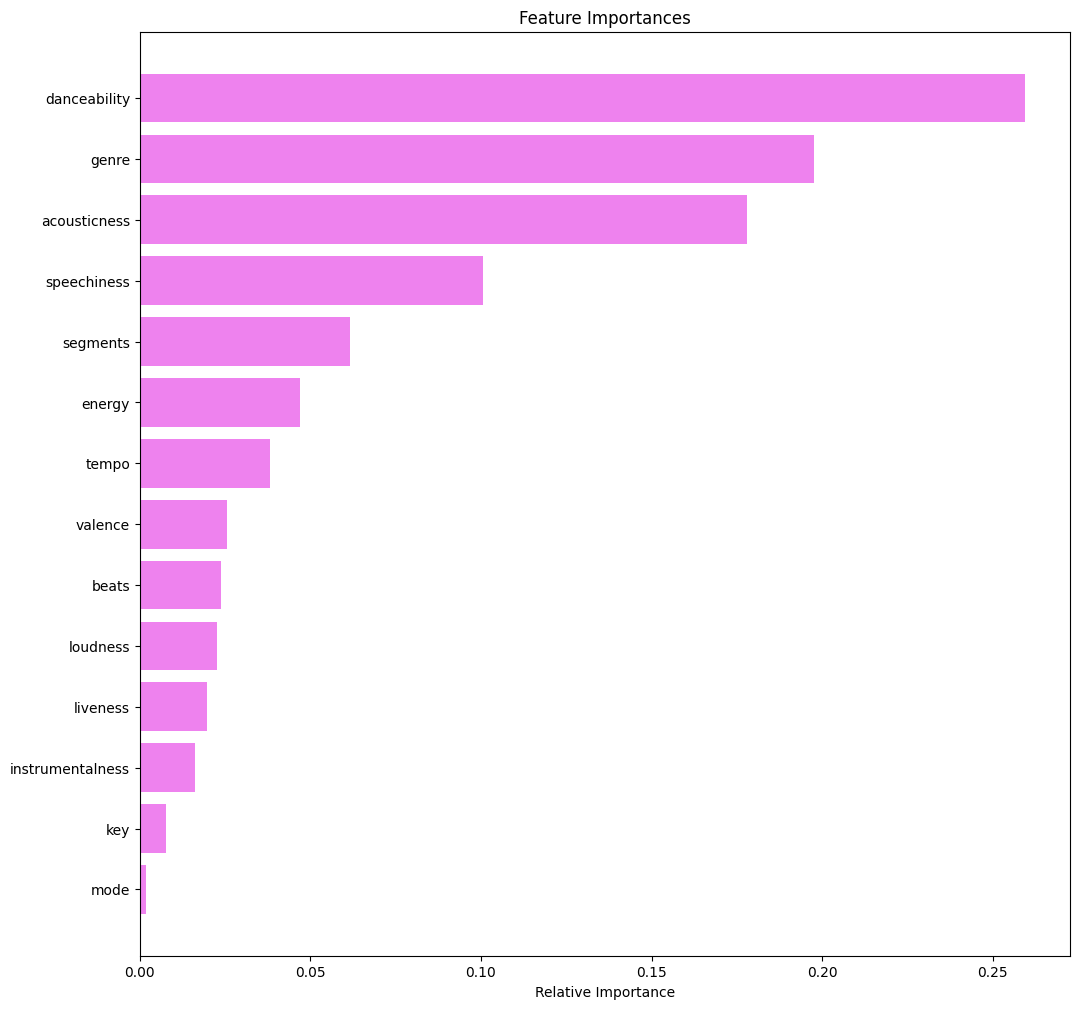

In [135]:
feature_names = X_train.columns 
importances = rf_estimator.feature_importances_ 
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")

if len(indices) >= 20:
    plt.barh(range(len(indices)-20, len(indices)), importances[indices][-20:], color="violet", align="center")
    plt.yticks(range(len(indices)-20, len(indices)), [feature_names[i] for i in indices][-20:])
else:
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")
plt.show()

